In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
Univ = pd.read_csv("https://raw.githubusercontent.com/mchandak/DS_Repo10/main/Data/Universities.csv")
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [3]:
# Normalization function # use sklearn library norm
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [4]:
# Normalized data frame (considering the numerical part of data)
np.set_printoptions(precision=2)
df_norm = norm_func(Univ.iloc[:,1:])

In [5]:
df_norm.round(2)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.74,0.85,0.11,0.37,0.26,0.90
1,1.00,1.00,0.14,0.00,1.00,0.47
2,0.62,0.47,0.59,0.16,0.30,0.17
3,0.74,0.67,0.13,0.32,0.42,0.70
4,0.67,0.76,0.25,0.37,0.24,0.77
5,0.82,0.85,0.12,0.21,0.43,0.93
6,0.76,0.86,0.21,0.32,0.42,0.93
7,0.61,0.64,0.13,0.32,0.21,0.83
8,0.96,0.88,0.00,0.26,0.56,1.00
9,0.73,0.65,0.39,0.05,0.91,0.67


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df_norm1 = scaler.fit_transform(Univ.iloc[:,1:])
df_norm1                                           

array([[0.74, 0.85, 0.11, 0.37, 0.26, 0.9 ],
       [1.  , 1.  , 0.14, 0.  , 1.  , 0.47],
       [0.62, 0.47, 0.59, 0.16, 0.3 , 0.17],
       [0.74, 0.67, 0.13, 0.32, 0.42, 0.7 ],
       [0.67, 0.76, 0.25, 0.37, 0.24, 0.77],
       [0.82, 0.85, 0.12, 0.21, 0.43, 0.93],
       [0.76, 0.86, 0.21, 0.32, 0.42, 0.93],
       [0.61, 0.64, 0.13, 0.32, 0.21, 0.83],
       [0.96, 0.88, 0.  , 0.26, 0.56, 1.  ],
       [0.73, 0.65, 0.39, 0.05, 0.91, 0.67],
       [0.91, 0.92, 0.21, 0.21, 0.48, 0.8 ],
       [0.62, 0.79, 0.33, 0.26, 0.35, 0.73],
       [0.61, 0.74, 0.37, 0.37, 0.12, 0.9 ],
       [0.19, 0.14, 0.53, 0.63, 0.03, 0.43],
       [0.9 , 0.88, 0.  , 0.11, 0.39, 0.93],
       [0.  , 0.  , 1.  , 0.68, 0.01, 0.07],
       [0.87, 0.86, 0.08, 0.32, 0.51, 0.87],
       [0.17, 0.29, 0.7 , 1.  , 0.  , 0.  ],
       [0.57, 0.93, 0.34, 0.58, 0.12, 0.37],
       [0.7 , 0.65, 0.47, 0.37, 0.54, 0.67],
       [0.43, 0.51, 0.71, 0.53, 0.12, 0.6 ],
       [0.68, 0.72, 0.29, 0.26, 0.34, 0.77],
       [0.

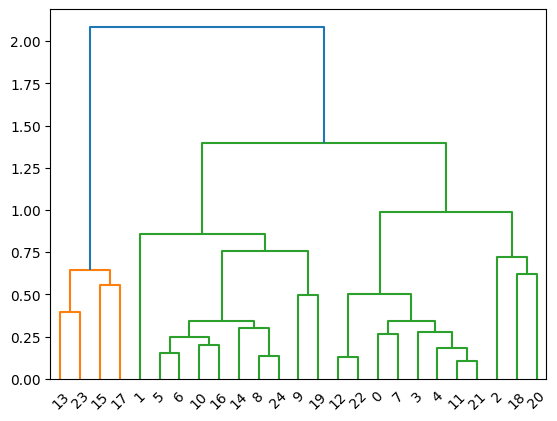

In [7]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [8]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, metric = 'euclidean', linkage = 'complete')

In [9]:
hc.fit(df_norm)
# hc.predict(df_norm)

AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=5)

In [10]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
# Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [11]:
y_hc

array([3, 4, 2, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 1, 0, 1, 0, 1, 2, 0, 2, 3,
       3, 1, 0], dtype=int64)

In [12]:
Univ['h_clusterid'] = y_hc

In [13]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,4
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3


In [14]:
Univ1=Univ.sort_values("h_clusterid")
Univ1.iloc[:,[0,-1]]

,Univ,h_clusterid
24,Yale,0
14,Princeton,0
10,MIT,0
9,JohnsHopkins,0
16,Stanford,0
19,UChicago,0
8,Harvard,0
5,Dartmouth,0
6,Duke,0
23,UWisconsin,1
